In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsapi_parameters_script import DATA_FILE_LOCATION , LEAGUE_NAME_LOCATION, american_league_team_id_name,national_league_team_id_name
from datetime import datetime

In [2]:
TODAY_DATE_TIME_EXECUTION = datetime.today().strftime("%Y-%m-%d")
print(TODAY_DATE_TIME_EXECUTION)

2023-06-18


Importing the data

In [3]:
todays_data: dict = {}
for league_name in ["american_league", "national_league"]:
    TODAY_BATTER_DATA_FILE_NAME = f"{DATA_FILE_LOCATION}{league_name}_{TODAY_DATE_TIME_EXECUTION}_batter_stats_df.csv"
    todays_data[league_name] = pd.read_csv(TODAY_BATTER_DATA_FILE_NAME, index_col=0)

In [8]:
player_information_features = ["playername","team_id", "gamesPlayed","plateAppearances"]

In [10]:
def team_id_name_correspondence(league_name: str):
    if league_name == "american_league":
        team_id_name = american_league_team_id_name()
    elif league_name == "national_league":
        team_id_name = national_league_team_id_name()
    else:
        raise Exception("Unknown league name")
    return team_id_name

Checking xxx

In [11]:
plate_normalized_data: dict = {}
team_averages_data: dict = {}
for league in todays_data.keys():
    plate_normalized_features = [col for col in todays_data[league].columns if 'perplateAppearance' in col]
    plate_normalized_data_columns = player_information_features + plate_normalized_features
    plate_normalized_data[league] = todays_data[league][plate_normalized_data_columns]

    team_averages_data[league] = plate_normalized_data[league].groupby("team_id").mean()
    team_averages_data[league]["team_name"] = None

    team_id_name = team_id_name_correspondence(league)

    for team_id, team_name in team_id_name.items():
        team_averages_data[league].loc[team_id, "team_name"] = team_name
    team_averages_data[league] = team_averages_data[league].set_index("team_name")
    

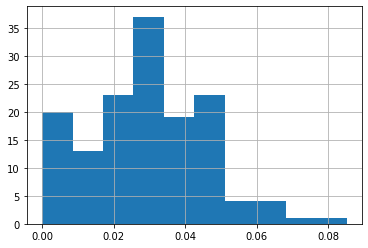

In [12]:
plate_normalized_data["american_league"]["homeRunsperplateAppearance"].hist()
plt.show()

## Team analysis

In [13]:
team_averages_data["american_league"].head()

,gamesPlayed,plateAppearances,strikeOutsperplateAppearance,homeRunsperplateAppearance,hitsperplateAppearance,rbiperplateAppearance,baseOnBallsperplateAppearance,totalBasesperplateAppearance,difstrikeOutsbaseOnBallsperplateAppearance
team_name,,,,,,,,,
Los Angeles Angels,36.625000,244.750000,0.236198,0.030960,0.208846,0.125687,0.098287,0.342113,0.137911
Baltimore Orioles,7.375000,225.625000,0.213410,0.030202,0.224493,0.113040,0.083271,0.373046,0.130139
Boston Red Sox,16.636364,209.363636,0.214271,0.024697,0.232611,0.123186,0.089855,0.374204,0.124416
Cleveland Guardians,28.333333,247.666667,0.181159,0.019182,0.224209,0.096336,0.085584,0.338992,0.095576
Detroit Tigers,12.000000,179.600000,0.244411,0.026216,0.197925,0.093114,0.083180,0.325251,0.161231


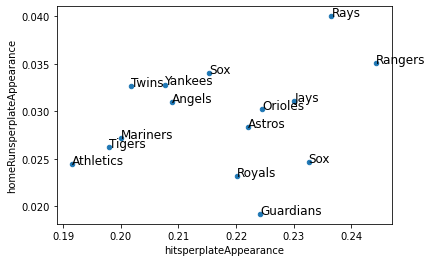

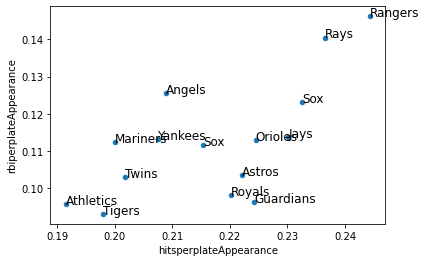

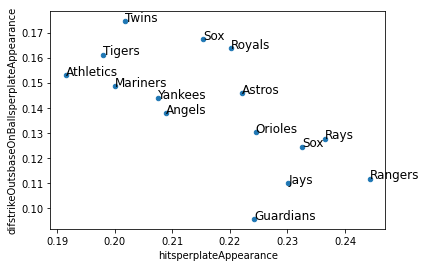

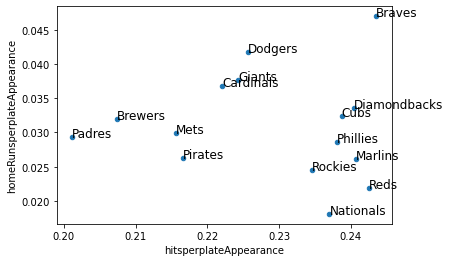

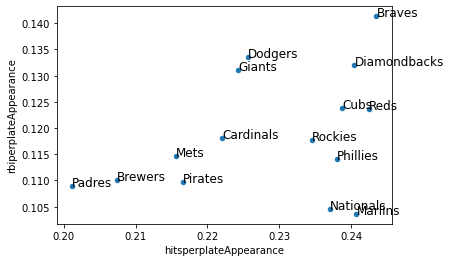

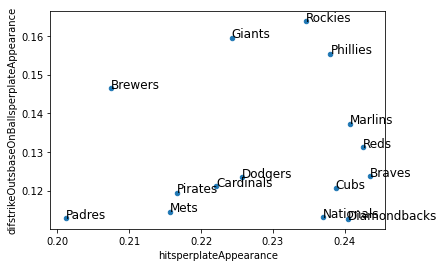

In [14]:
x_var = "hitsperplateAppearance"
y_var = "homeRunsperplateAppearance"

for league, df in team_averages_data.items():
    team_averages = df
    for y_var in ["homeRunsperplateAppearance", "rbiperplateAppearance", "difstrikeOutsbaseOnBallsperplateAppearance"]:
        fig, ax = plt.subplots()
        (
            team_averages.plot(
                ax=ax,  # type: ignore
                kind="scatter",
                x=x_var,
                y=y_var,
            )
        )
        for i, txt in enumerate(team_averages.index.values):
            ax.annotate(
                txt.split(" ")[-1],
                (
                    team_averages[x_var].values[i],
                    team_averages[y_var].values[i],
                ),  # type: ignore
                fontsize=12,
            )

## Luis Arraez analysis

In [24]:
def get_league_player_stats(league_name = None) -> pd.DataFrame:
    if league_name is None:
        return pd.concat([df for df in todays_data.values()])
    else:
        return todays_data["national_league"]

In [57]:
full_stats_df = get_league_player_stats()

In [68]:
luis_arraez_df = full_stats_df[full_stats_df["playername"] == "Luis Arraez"]

In [71]:
luis_arraez_df[['avg','normalized_avg']]

,avg,normalized_avg
650333,0.388,151.53332


In [58]:
normalized_features = [col for col in todays_data["national_league"].columns if 'normalized' in col]
normalized_columns = player_information_features + normalized_features
print(normalized_columns)
normalized_analysis = full_stats_df[normalized_columns]

['playername', 'team_id', 'gamesPlayed', 'plateAppearances', 'normalized_avg', 'normalized_babip', 'normalized_obp', 'normalized_ops', 'normalized_hits', 'normalized_rbi', 'normalized_baseOnBalls', 'normalized_totalBases', 'normalized_difstrikeOutsbaseOnBalls']


In [59]:
normalized_analysis.shape

(287, 13)

In [60]:
## compute rank to check which other categories is Luiz Arraez leading

In [61]:
for column in normalized_features:
    normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)

/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)
/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)
/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [62]:
ranked_data = normalized_analysis[['playername'] + [col for col in normalized_analysis.columns if 'rank' in col]]

In [63]:
ranked_data[ranked_data["playername"] == "Luis Arraez"]

,playername,normalized_avg_rank,normalized_babip_rank,normalized_obp_rank,normalized_ops_rank,normalized_hits_rank,normalized_rbi_rank,normalized_baseOnBalls_rank,normalized_totalBases_rank,normalized_difstrikeOutsbaseOnBalls_rank
650333,Luis Arraez,1.0,4.0,1.0,9.5,2.0,79.5,112.5,39.0,286.5


In [64]:
ranked_data[["playername","normalized_difstrikeOutsbaseOnBalls_rank"]].sort_values(by ="normalized_difstrikeOutsbaseOnBalls_rank", ascending=False)

,playername,normalized_difstrikeOutsbaseOnBalls_rank
669257,Will Smith,286.5
650333,Luis Arraez,286.5
668939,Adley Rutschman,284.5
669257,Will Smith,284.5
608070,Jose Ramirez,283.0
...,...,...
681546,James Outman,5.0
678662,Ezequiel Tovar,4.0
660271,Shohei Ohtani,3.0
673357,Robert Jr.,2.0


In [65]:
full_stats_df.columns

Index(['playername', 'team_id', 'gamesPlayed', 'groundOuts', 'airOuts', 'runs',
       'doubles', 'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls',
       'intentionalWalks', 'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg',
       'ops', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'plateAppearances', 'totalBases', 'rbi', 'leftOnBase', 'sacBunts',
       'sacFlies', 'groundOutsToAirouts', 'catchersInterference', 'babip',
       'difstrikeOutsbaseOnBalls', 'strikeOutsperplateAppearance',
       'homeRunsperplateAppearance', 'hitsperplateAppearance',
       'rbiperplateAppearance', 'baseOnBallsperplateAppearance',
       'totalBasesperplateAppearance',
       'difstrikeOutsbaseOnBallsperplateAppearance', 'avg_mean', 'avg_std',
       'normalized_avg', 'avg_z_score', 'babip_mean', 'babip_std',
       'normalized_babip', 'babip_z_score', 'obp_mean', 'obp_std',
       'normalized_obp', 'obp_z_score', 'ops_mean', 'ops_std',
       'normalized_ops', 'ops_z_score', 'hi